In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solid-waste-for-pune-updated/pune_SWM2013-2021.csv


Year	TPD
2013	1397
2014	1459
2015	983
2016	1524
2017	1710
2018	1821
2019	2087
2020	1439
2021	1709
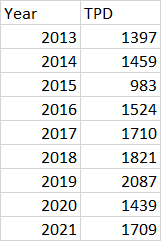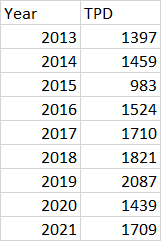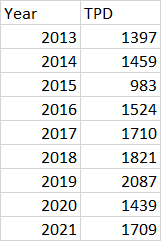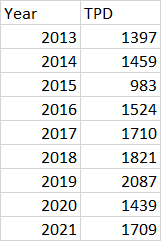

In [2]:
data= pd.read_csv('../input/solid-waste-for-pune-updated/pune_SWM2013-2021.csv')

In [3]:
data.head()

,Date,Total waste in MetricTonne
0,1/1/2013,1223.560
1,1/2/2013,1175.390
2,1/3/2013,1246.250
3,1/4/2013,1260.033
4,1/5/2013,1313.550


In [4]:
pip install darts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 692.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.6/184.6 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.13
    Uninstalling holidays-0.13:
      Successfully uninstalled holidays-0.13
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
  Attempting uninstall: prophet
    Found existing installation: prophet 1.0.1
    Uninstalling prophet-1.0.1:
      

### Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
#from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf``
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

Text(0.5, 1.0, 'Daily MSW Generation for PMC')

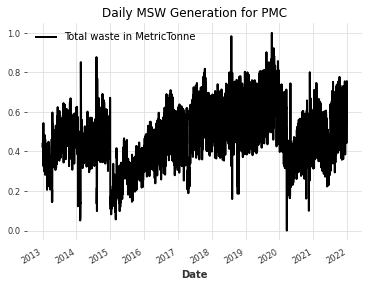

In [6]:
# Read datafiller = MissingValuesFiller()
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
       TimeSeries.from_dataframe(data, 'Date', 'Total waste in MetricTonne', freq='D')
    )
).astype(np.float32)
series.plot()
plt.title("Daily MSW Generation for PMC")
#series = series.astype(np.float32)

In [7]:

# Create training and validation sets:
training_cutoff = pd.Timestamp("20191231")
train, val = series.split_after(training_cutoff)

In [8]:
# Create training and validation sets:
training_cutoff = pd.Timestamp("20191231")
train, val = series.split_after(training_cutoff)

In [9]:
train

<TimeSeries (DataArray) (Date: 2556, component: 1, sample: 1)>
array([[[0.43912062]],

       [[0.4201334 ]],

       [[0.4480644 ]],

       ...,

       [[0.43678242]],

       [[0.65063334]],

       [[0.6942839 ]]], dtype=float32)
Coordinates:
  * Date       (Date) datetime64[ns] 2013-01-01 2013-01-02 ... 2019-12-31
  * component  (component) object 'Total waste in MetricTonne'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [10]:
val

<TimeSeries (DataArray) (Date: 731, component: 1, sample: 1)>
array([[[0.6957482 ]],

       [[0.6144638 ]],

       [[0.65450174]],

       [[0.6795766 ]],

       [[0.39760256]],

       [[0.7039229 ]],

       [[0.67047673]],

       [[0.676787  ]],

       [[0.6714681 ]],

       [[0.6742907 ]],

...

       [[0.6869401 ]],

       [[0.6578877 ]],

       [[0.6440168 ]],

       [[0.44237846]],

       [[0.6958464 ]],

       [[0.7393826 ]],

       [[0.709936  ]],

       [[0.7560344 ]],

       [[0.5563728 ]],

       [[0.70628285]]], dtype=float32)
Coordinates:
  * Date       (Date) datetime64[ns] 2020-01-01 2020-01-02 ... 2021-12-31
  * component  (component) object 'Total waste in MetricTonne'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [11]:
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [12]:
# create year, month and integer index covariate series
covariates = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
covariates = covariates.stack(
    datetime_attribute_timeseries(series, attribute="month", one_hot=False)
)
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=series.time_index,
        values=np.arange(len(series)),
        columns=["linear_increase"],
    )
)
covariates = covariates.astype(np.float32)

In [13]:
# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
cov_train, cov_val = covariates.split_after(training_cutoff)
scaler_covs.fit(cov_train)
covariates_transformed = scaler_covs.transform(covariates)

In [14]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]
input_chunk_length = 1825
forecast_horizon = 365
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=16,
    n_epochs=500,
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
)

In [15]:
my_model.fit(train_transformed, future_covariates=covariates_transformed, verbose=True)

Training: 0it [00:00, ?it/s]

In [16]:
figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [17]:
def eval_model(model, n, actual_series, val_series):
    num_samples = 1825
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    plt.title("MAPE: {:.2f}%".format(mape(val_series, pred_series)))
    plt.legend()




## Function call to evaluate the model

Predicting: 23it [00:00, ?it/s]

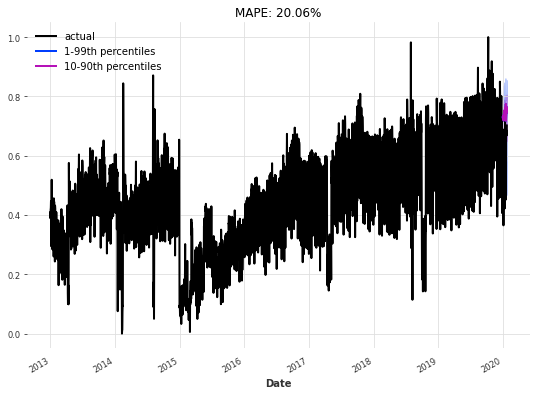

In [18]:
eval_model(my_model, 24, series_transformed, val_transformed)

In [19]:
n=24

In [20]:
num_samples = 1825

In [21]:
 my_model.predict(n=n, num_samples=num_samples)

Predicting: 23it [00:00, ?it/s]

<TimeSeries (DataArray) (Date: 24, component: 1, sample: 1825)>
array([[[0.72429276, 0.7070258 , 0.7069341 , ..., 0.7781111 ,
         0.667438  , 0.729768  ]],

       [[0.7468765 , 0.7346337 , 0.77239907, ..., 0.6991079 ,
         0.7353614 , 0.6230463 ]],

       [[0.77230704, 0.7440737 , 0.72544414, ..., 0.72303176,
         0.7077024 , 0.7001096 ]],

       ...,

       [[0.7606079 , 0.8080204 , 0.7409196 , ..., 0.70212895,
         0.7279129 , 0.58675766]],

       [[0.77625275, 0.707315  , 0.77814806, ..., 0.6442208 ,
         0.7792762 , 0.7269327 ]],

       [[0.7454398 , 0.723694  , 0.7481821 , ..., 0.7518125 ,
         0.7491957 , 0.72039115]]], dtype=float32)
Coordinates:
  * Date       (Date) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-01-24
  * component  (component) object 'Total waste in MetricTonne'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [22]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

In [23]:
r2= r2_score(series_transformed, val_transformed)
print("R2 score :",r2)
mape=mean_absolute_percentage_error(series_transformed, val_transformed)
print("MAPE :",mape)
rmse=math.sqrt(mean_squared_error(series_transformed, val_transformed))
print("RMSE :", rmse)
mae=mean_absolute_error(series_transformed, val_transformed)
print("MAE :", mae)

ValueError: Found input variables with inconsistent numbers of samples: [3287, 731]

In [ ]:
mape(series_transformed, val_transformed)

In [ ]:
num_samples = 1825

In [ ]:
eval_model(my_model, 731, series_transformed, val_transformed)